In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import optuna

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Важная настройка для корректной настройки pipeline!
import sklearn
sklearn.set_config(transform_output="pandas")



# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, KFold

# for model learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

#models
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_test = 'test.csv'
path_train = 'train.csv'
data_test = pd.read_csv(path_test)
data_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
data_train = pd.read_csv(path_train)
data_train.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = pd.concat([data_train, data_test], axis = 0)
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
df.shape

(2919, 81)

<Axes: >

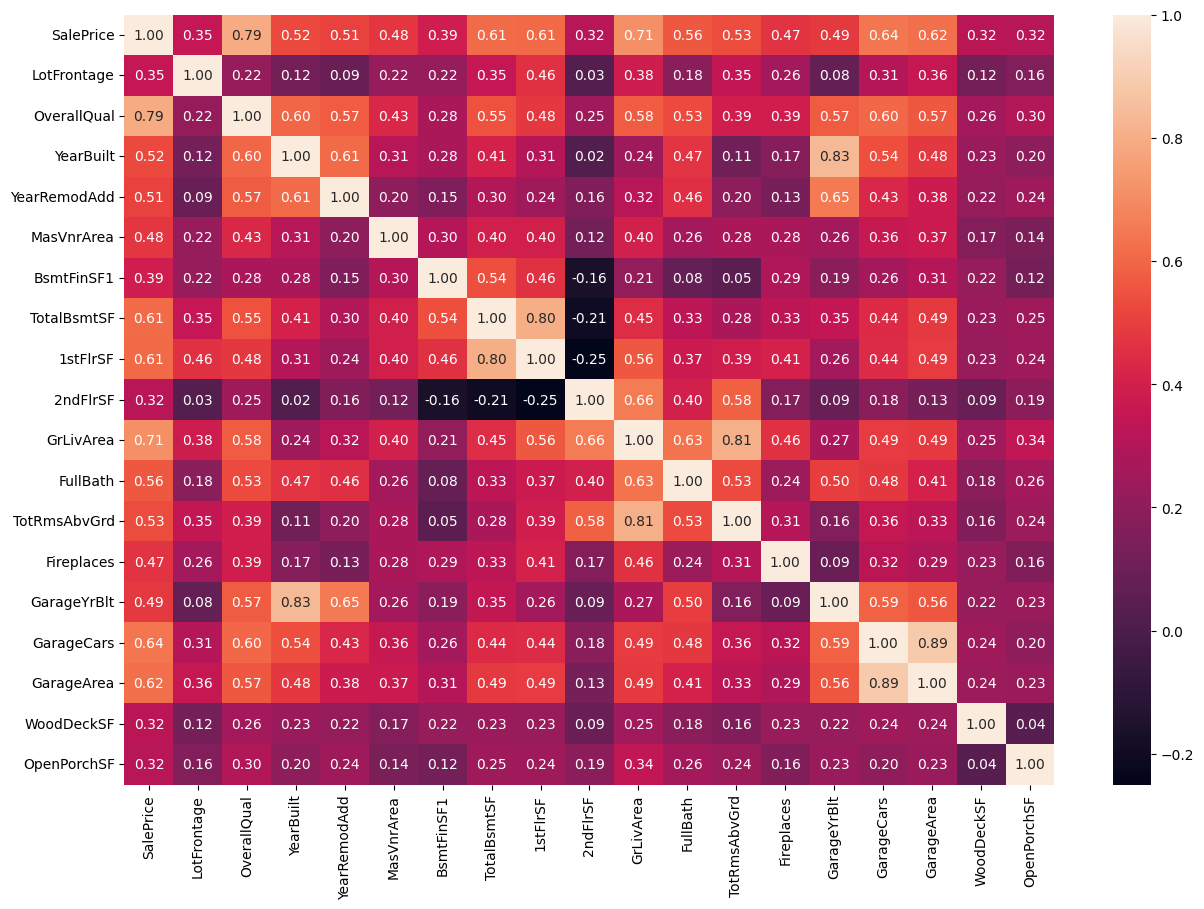

In [6]:
numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns
cor = df[['SalePrice', 'LotFrontage', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF']].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(cor,  annot=True, fmt='.2f')


In [7]:
###OneHotEncoder(Alley(2), MSZoning(5),LotShape(4),LandContour(4), LotConfig(5), LandSlope(3), BldgType(5), ExterQual(4), ExterCond(5), Foundation(6), BsmtQual(4), BsmtCond(4), BsmtExposure(4),
# BsmtFinType1(6),BsmtFinType2(6),Heating(6), HeatingQC(5), Electrical(5), KitchenQual(4), Functional(7?????), FireplaceQu(5), GarageType(6),  GarageFinish(3), GarageQual(5),
#  GarageCond(5), PavedDrive(3), PoolQC(3), Fence(4), MiscFeature(4),    )
### На удаление Utilities(неинформативный столбец), MasVnrType, SaleType, SaleCondition
### labelencoding (street(2),CentralAir(2),  )
### Target (Neighborhood, RoofStyle, Condition1, Condition2, HouseStyle, RoofMatl, Exterior1st, Exterior2nd)



In [8]:
###численные признаки
##на удаление(ID,YrSold, MoSold,MiscVal,PoolArea,ScreenPorch,3SsnPorch, EnclosedPorch, KitchenAbvGr, BedroomAbvGr, HalfBath, BsmtHalfBath, BsmtFullBath, LowQualFinSF, BsmtUnfSF, BsmtFinSF1, OverallCond,
# LotArea,MSSubClass, overallcond, 1stFlrS, GarageCars, GrLivArea  )

In [9]:
df1=df

In [10]:
pd.DataFrame(data={
    'Nan_count': df.isna().sum(),
    'data_type': df.dtypes
})

,Nan_count,data_type
Id,0,int64
MSSubClass,0,int64
MSZoning,4,object
LotFrontage,486,float64
LotArea,0,int64
Street,0,object
Alley,2721,object
LotShape,0,object
LandContour,0,object
Utilities,2,object


In [11]:
numeric_features = df1.select_dtypes(include=['number']).columns
categorical_features = df1.select_dtypes(include=['object', 'category']).columns

In [12]:
omissions  = pd.DataFrame(data={
    'Nan_count': df1.isna().sum(),
    'data_type': df1.dtypes
})
omissions = omissions[omissions['Nan_count'] > 0]
omissions = omissions.sort_values(by='Nan_count', ascending=False)
omissions

,Nan_count,data_type
PoolQC,2909,object
MiscFeature,2814,object
Alley,2721,object
Fence,2348,object
MasVnrType,1766,object
SalePrice,1459,float64
FireplaceQu,1420,object
LotFrontage,486,float64
GarageCond,159,object
GarageYrBlt,159,float64


In [13]:
X = data_train.drop('SalePrice', axis = 1)
y = data_train['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# # рабочий вариант 

# targetlist = ['Neighborhood', 'RoofStyle', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MSZoning', 'LotConfig', 'BldgType', 
#               'ExterCond', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical','Functional','FireplaceQu', 'GarageType','GarageQual','GarageCond',
#               'LandContour', 'LotShape', 'Alley','LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'KitchenQual', 'PavedDrive', 
#               'PoolQC', 'Fence', 'MiscFeature']
# #onehotlist = ['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'KitchenQual', 'PavedDrive', 
# #              'PoolQC', 'Fence', 'MiscFeature']
# labellist =['Street','CentralAir']

# cdrop = ['Id', 'YrSold', 'MoSold', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 
#          'LowQualFinSF', 'BsmtUnfSF', 'BsmtFinSF1', 'OverallCond', 'LotArea', 'MSSubClass', '1stFlrSF', 'GarageCars', 'GrLivArea', 'Utilities', 'MasVnrType', 'SaleType', 'SaleCondition']

# drops = ColumnTransformer(
#     transformers=[
#         ('drop', 'drop', cdrop)
#     ],
#     verbose_feature_names_out=False,
#     remainder='passthrough'
# )

# df_droped = drops.fit_transform(X_train)

In [15]:
# targetlist = ['Neighborhood', 'RoofStyle', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MSZoning', 'LotConfig', 'BldgType', 
#               'ExterCond', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical','Functional','FireplaceQu', 'GarageType','GarageQual','GarageCond',
#               'LandContour', 'LotShape']
# onehotlist = ['Alley', 'LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'KitchenQual', 'PavedDrive', 
#               'PoolQC', 'Fence', 'MiscFeature', 'KitchenAbvGr']
# labellist =['Street','CentralAir']

cdrop = ['MoSold', '3SsnPorch', 'BsmtFinType2', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id', 'YrSold', 'LowQualFinSF', 'BsmtHalfBath']
# cdrop = ['YrSold', 'MoSold', '3SsnPorch', 'BsmtFinType2', 'LowQualFinSF', 'BsmtHalfBath', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id']
# cutted 'MiscVal', 'PoolArea', 'ScreenPorch', EnclosedPorch, 'BedroomAbvGr'
# onehot 'KitchenAbvGr'
drops = ColumnTransformer(
    transformers=[
        ('drop', 'drop', cdrop)
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'
)

df_droped = drops.fit_transform(X_train)

In [16]:
df.HalfBath.value_counts()

HalfBath
0    1834
1    1060
2      25
Name: count, dtype: int64

In [17]:
# targetlist = ['Neighborhood', 'RoofStyle', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MSZoning', 'LotConfig', 'BldgType', 
#               'ExterCond', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical','Functional','FireplaceQu', 'GarageType','GarageQual','GarageCond',
#               'LandContour', 'LotShape']
# onehotlist = ['Alley', 'LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'KitchenQual', 'PavedDrive', 
#               'PoolQC', 'Fence', 'MiscFeature']
# labellist =["Street","CentralAir"]

# cdrop = ['Alley', 'Id', 'YrSold', 'MoSold', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 
#          'LowQualFinSF', 'BsmtUnfSF', 'BsmtFinSF1', 'OverallCond', 'LotArea', 'MSSubClass', '1stFlrSF', 'GarageCars', 'GrLivArea', 'Utilities', 'MasVnrType', 'SaleType', 'SaleCondition']

# drops = ColumnTransformer(
#     transformers=[
#         ('drop', 'drop', cdrop)
#     ],
#     verbose_feature_names_out=False,
#     remainder='passthrough'
# )

In [18]:
# Выбор числовых и категориальных столбцов
df_cat = pd.DataFrame(df_droped).select_dtypes(include=['object'])
categorical_features = df_cat.columns.tolist()

df_num = pd.DataFrame(df_droped).select_dtypes(include=['float64', 'int64'])
numeric_features = df_num.columns.tolist()

numeric_transformer = SimpleImputer(strategy='constant', fill_value=0)
categorical_transformer = SimpleImputer(strategy='constant', fill_value='no value')

imputer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'
)



In [19]:
# filled = imputer.fit_transform(df_droped)

In [20]:
scaler = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_features),
        ('target_encoding', TargetEncoder(), categorical_features)#,
        # ('one_hot_encoding', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), onehotlist),
        # ('label_encoding', OrdinalEncoder(), labellist)
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'


)

In [21]:
# encoded = scaler.fit_transform(filled, y_train)
# encoded.head(10)


In [22]:
# scaler2 = ColumnTransformer(
#     transformers=[
#         ('scaler', StandardScaler(), categorical_features)
#         #('target_encoding', TargetEncoder(), targetlist),
#         #('one_hot_encoding', OneHotEncoder(sparse_output=False), onehotlist),
#         #('label_encoding', OrdinalEncoder(), labellist)
#     ],
#     verbose_feature_names_out=False,
#     remainder='passthrough'


# )

In [23]:
# encoded2 = scaler2.fit_transform(encoded, y_train)
# encoded2.head(10)

In [24]:
# Создание конвейера
preprocessor = Pipeline([
    ('drops', drops),
    ('imputer', imputer),
    ('scaler', scaler ),
    # ('scaler2', scaler2),
    ('model', CatBoostRegressor())
]) 

In [25]:
preprocessor.fit(X_train, np.log(y_train))

Learning rate set to 0.04196
0:	learn: 0.3799085	total: 57.8ms	remaining: 57.7s
1:	learn: 0.3697866	total: 62.3ms	remaining: 31.1s
2:	learn: 0.3608799	total: 66ms	remaining: 21.9s
3:	learn: 0.3511463	total: 69.6ms	remaining: 17.3s
4:	learn: 0.3420170	total: 71.9ms	remaining: 14.3s
5:	learn: 0.3327588	total: 73.5ms	remaining: 12.2s
6:	learn: 0.3250213	total: 75.5ms	remaining: 10.7s
7:	learn: 0.3175556	total: 77ms	remaining: 9.54s
8:	learn: 0.3096773	total: 78.5ms	remaining: 8.65s
9:	learn: 0.3017276	total: 80.4ms	remaining: 7.96s
10:	learn: 0.2948103	total: 83ms	remaining: 7.46s
11:	learn: 0.2881525	total: 85.3ms	remaining: 7.02s
12:	learn: 0.2816101	total: 87.2ms	remaining: 6.62s
13:	learn: 0.2752261	total: 90.3ms	remaining: 6.36s
14:	learn: 0.2697044	total: 96.8ms	remaining: 6.36s
15:	learn: 0.2640553	total: 105ms	remaining: 6.46s
16:	learn: 0.2582712	total: 110ms	remaining: 6.37s
17:	learn: 0.2525489	total: 119ms	remaining: 6.48s
18:	learn: 0.2476081	total: 123ms	remaining: 6.37s
19:

/home/maxim/.local/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('drops',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['MoSold', '3SsnPorch',
                                                   'BsmtFinType2', 'Alley',
                                                   'PoolQC', 'Fence',
                                                   'MiscFeature', 'Id',
                                                   'YrSold', 'LowQualFinSF',
                                                   'BsmtHalfBath'])],
                                   verbose_feature_names_out=False)),
                ('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(fill_valu...
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', ...])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7055d998e5c0>)])

In [26]:
import joblib

preprocessor1 = preprocessor.fit(X_train, np.log(y_train))
# Сохранение preprocessor
joblib.dump(preprocessor1, 'preprocessor.joblib')

Learning rate set to 0.04196
0:	learn: 0.3799085	total: 4.05ms	remaining: 4.05s
1:	learn: 0.3697866	total: 6.96ms	remaining: 3.47s
2:	learn: 0.3608799	total: 9.99ms	remaining: 3.32s
3:	learn: 0.3511463	total: 12.7ms	remaining: 3.17s
4:	learn: 0.3420170	total: 16.6ms	remaining: 3.29s
5:	learn: 0.3327588	total: 19.6ms	remaining: 3.25s
6:	learn: 0.3250213	total: 22.1ms	remaining: 3.13s
7:	learn: 0.3175556	total: 26.2ms	remaining: 3.25s
8:	learn: 0.3096773	total: 28.5ms	remaining: 3.14s
9:	learn: 0.3017276	total: 31.2ms	remaining: 3.09s
10:	learn: 0.2948103	total: 35.9ms	remaining: 3.22s
11:	learn: 0.2881525	total: 37.7ms	remaining: 3.1s
12:	learn: 0.2816101	total: 40.5ms	remaining: 3.07s
13:	learn: 0.2752261	total: 43ms	remaining: 3.03s
14:	learn: 0.2697044	total: 47.4ms	remaining: 3.11s
15:	learn: 0.2640553	total: 50.1ms	remaining: 3.08s
16:	learn: 0.2582712	total: 53.2ms	remaining: 3.08s
17:	learn: 0.2525489	total: 55.8ms	remaining: 3.05s
18:	learn: 0.2476081	total: 57.7ms	remaining: 2.

['preprocessor.joblib']

In [27]:
y_preds = preprocessor.predict(X_valid)
test2 = pd.read_csv('sample_submission.csv')
data_test.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
testy_preds = preprocessor.predict(data_test)


In [29]:
print('MSLE:', mean_squared_error(np.log(test2['SalePrice']), testy_preds))

itog = pd.DataFrame({'Id': data_test['Id'], 'SalePrice':np.exp(testy_preds) })

# itog.to_csv('output12.csv', index=False)

MSLE: 0.1421707331250061


In [30]:
# def objective(trial):
#     #настройка optuna
#     params = {
#         'iterations': trial.suggest_int('iterations',1, 50),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.3),
#         'depth': trial.suggest_int('depth', 1, 10),
#         'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 100),
#         'random_strength': trial.suggest_uniform('random_strength', 1e-8, 10),
#         'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
#         'border_count': trial.suggest_int('border_count', 2, 255),
#         'verbose': False
#     }

    
#     preprocessor = Pipeline([
#         ('drops', drops),
#         ('imputer', imputer),
#         ('scaler', scaler),
#         ('model', CatBoostRegressor(**params))
#     ])

    
#     preprocessor.fit(X_train, np.log(y_train))

    
#     y_pred = preprocessor.predict(X_valid)
#     msle = mean_squared_error(np.log(y_valid), y_pred)

#     return msle


# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# # Вывод лучших параметров
# print("Best parameters:", study.best_params)

In [31]:
# #Обучение модели с лучшими параметрами
# best_params = study.best_params
# final_model = Pipeline([
#     ('drops', drops),
#     ('imputer', imputer),
#     ('scaler', scaler),
#     ('model', CatBoostRegressor(**best_params))
# ])

# final_model.fit(X_train, np.log(y_train))


# test_preds = final_model.predict(data_test)


# itog = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': np.exp(test_preds)})
# itog.to_csv('submission3.csv', index=False)

# # Оценка на валидационной выборке
# valid_preds = final_model.predict(X_valid)
# print('Validation MSLE:', mean_squared_error(np.log(y_valid), valid_preds))